#  Search H R 3
Example to illustrate the influence of number of iterations in deconvolution
in high resolution peak searching function (class TSpectrum).




**Author:**  Miroslav Morhac, Olivier Couet  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 03:38 AM.</small></i>

In [1]:
Double_t fPositionX[100];
Double_t fPositionY[100];
Int_t fNPeaks = 0;
Int_t i,nfound,bin;
const Int_t nbins = 1024;
Double_t xmin     = 0;
Double_t xmax     = nbins;
Double_t a;
Double_t source[nbins], dest[nbins];
gROOT->ForceStyle();

TString dir  = gROOT->GetTutorialDir();
TString file = dir+"/spectrum/TSpectrum.root";
TFile *f     = new TFile(file.Data());
TH1F *h = (TH1F*) f->Get("back2");
h->SetTitle("Influence of # of iterations in deconvolution in peak searching");
h->GetXaxis()->SetRange(1,nbins);

TH1F *d1 = new TH1F("d1","",nbins,xmin,xmax);
TH1F *d2 = new TH1F("d2","",nbins,xmin,xmax);
TH1F *d3 = new TH1F("d3","",nbins,xmin,xmax);
TH1F *d4 = new TH1F("d4","",nbins,xmin,xmax);

TSpectrum *s = new TSpectrum();

for (i = 0; i < nbins; i++) source[i]=h->GetBinContent(i + 1);
nfound = s->SearchHighRes(source, dest, nbins, 8, 2, kTRUE, 3, kTRUE, 3);

Double_t *xpeaks = s->GetPositionX();
for (i = 0; i < nfound; i++) {
   a=xpeaks[i];
   bin = 1 + Int_t(a + 0.5);
   fPositionX[i] = h->GetBinCenter(bin);
   fPositionY[i] = h->GetBinContent(bin);
}
TPolyMarker * pm = (TPolyMarker*)h->GetListOfFunctions()->FindObject("TPolyMarker");
if (pm) {
   h->GetListOfFunctions()->Remove(pm);
   delete pm;
}
pm = new TPolyMarker(nfound, fPositionX, fPositionY);
h->GetListOfFunctions()->Add(pm);
pm->SetMarkerStyle(23);
pm->SetMarkerColor(kRed);
pm->SetMarkerSize(1.3);

h->Draw("L");

for (i = 0; i < nbins; i++) d1->SetBinContent(i + 1,dest[i]);
d1->SetLineColor(kRed);
d1->Draw("SAME");

for (i = 0; i < nbins; i++) source[i]=h->GetBinContent(i + 1);
s->SearchHighRes(source, dest, nbins, 8, 2, kTRUE, 10, kTRUE, 3);
for (i = 0; i < nbins; i++) d2->SetBinContent(i + 1,dest[i]);
d2->SetLineColor(kBlue);
d2->Draw("SAME");

for (i = 0; i < nbins; i++) source[i]=h->GetBinContent(i + 1);
s->SearchHighRes(source, dest, nbins, 8, 2, kTRUE, 100, kTRUE, 3);
for (i = 0; i < nbins; i++) d3->SetBinContent(i + 1,dest[i]);
d3->SetLineColor(kGreen);
d3->Draw("SAME");

for (i = 0; i < nbins; i++) source[i]=h->GetBinContent(i + 1);
s->SearchHighRes(source, dest, nbins, 8, 2, kTRUE, 1000, kTRUE, 3);
for (i = 0; i < nbins; i++) d4->SetBinContent(i + 1,dest[i]);
d4->SetLineColor(kMagenta);
d4->Draw("SAME");

printf("Found %d candidate peaks\n",nfound);

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


Found 11 candidate peaks


Draw all canvases 

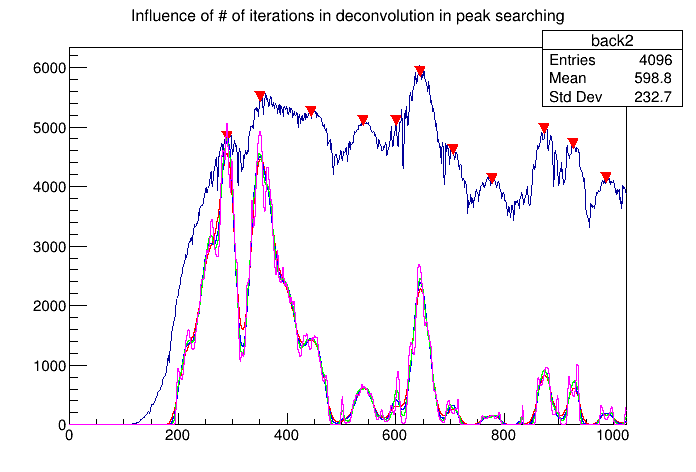

In [2]:
gROOT->GetListOfCanvases()->Draw()